In [68]:
import pandas as pd
import numpy as np
import cv2
from os import listdir
from os.path import join
import random
import seaborn_image as isns
import matplotlib.pyplot as plt


# Test

<AxesSubplot: >

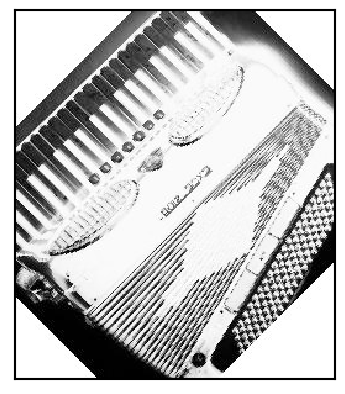

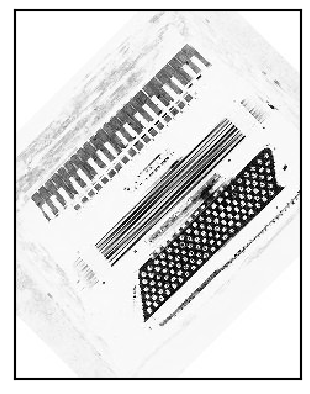

In [21]:
# path = r"C:\Users\bwez1\Documents\Main\Data\Image\MNIST\test\00000.png"
path1 = r"C:\Users\bwez1\Documents\Main\Data\Image\caltech-101\101_ObjectCategories\accordion\image_0001.jpg"
path2 = r"C:\Users\bwez1\Documents\Main\Data\Image\caltech-101\101_ObjectCategories\accordion\image_0002.jpg"
img1 = cv2.imread(path1, 0)
img2 = cv2.imread(path2, 0)

isns.imgplot(img1, cbar=False, cmap="Greys")
isns.imgplot(img2, cbar=False, cmap="Greys")

In [38]:
orb = cv2.ORB_create()
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
_, des1 = orb.detectAndCompute(img1, None)
_, des2 = orb.detectAndCompute(img2, None)
matches = bf.match(des1, des2)
print(len(matches))

sift = cv2.SIFT_create()
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
_, des1 = sift.detectAndCompute(img1, None)
_, des2 = sift.detectAndCompute(img2, None)
matches = bf.match(np.uint8(des1), np.uint8(des2))
print(len(matches))

114
85


Exception ignored in: <function tqdm.__del__ at 0x000001C8437F0430>
Traceback (most recent call last):
  File "c:\Users\bwez1\anaconda3\envs\imaging\lib\site-packages\tqdm\std.py", line 1162, in __del__
    self.close()
  File "c:\Users\bwez1\anaconda3\envs\imaging\lib\site-packages\tqdm\notebook.py", line 288, in close
    self.disp(bar_style='danger', check_delay=False)
AttributeError: 'tqdm_notebook' object has no attribute 'disp'


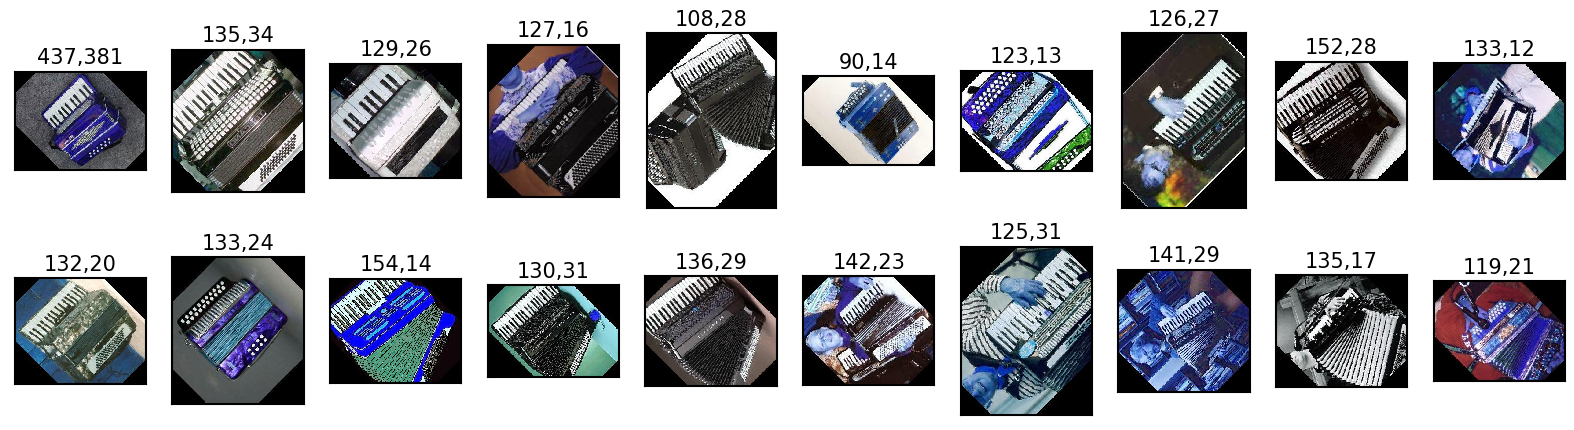

In [73]:
n = 20
path = r"C:\Users\bwez1\Documents\Main\Data\Image\caltech-101\101_ObjectCategories\accordion"
# path = r"C:\Users\bwez1\Documents\Main\Data\Image\MNIST\test"
imgs = [cv2.imread(join(path, imgPath)) for imgPath in random.sample([p for p in listdir(path)], n)]
siftdess = []
orbdess = []

orb = cv2.ORB_create()
sift = cv2.SIFT_create()
for img in imgs:
    kp, des = orb.detectAndCompute(img, None)
    orbdess.append(des)
    kp, des = sift.detectAndCompute(img, None)
    siftdess.append(des)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
fig, axs = plt.subplots(2, 10, figsize=(20, 5))
for i in range(n):
    ax = axs.flatten()[i]
    orbCnt = len(bf.match(orbdess[0], orbdess[i]))
    if siftdess[i] is None:
        siftCnt = 0
    else:
        siftCnt = len(bf.match(np.uint8(siftdess[0]), np.uint8(siftdess[i])))
    ax.title.set_text(str(orbCnt) + "," + str(siftCnt))
    isns.imgplot(imgs[i], cbar=False, cmap="Greys", ax=ax)

# Implement

In [80]:
class Engine:
    def __init__(self, dir) -> None:
        print(f"Directory: {dir}")
        self.dir = dir
        self.detectors = [
            cv2.ORB_create(),
            cv2.SIFT_create(),
        ]
        self.bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
        self.paths, self.features = self.scan()

    def describe(self, img):
        description = []
        for detector in self.detectors:
            _, des = detector.detectAndCompute(img, None)
            description.append(des)
        return description

    def scan(self):
        paths = []
        features = []
        print("Scanning Images")
        # for imgFile in tqdm(listdir(self.dir)):
        for imgFile in listdir(self.dir):
            paths.append(imgFile)
            img = cv2.imread(join(self.dir, imgFile))
            features.append(self.describe(img))
        return paths, features

    def search(self, path):
        img = cv2.imread(path)
        des = self.describe(img)
        comp = []
        print("Searching for Similar Images")
        for path, feature in zip(self.features, self.paths):
        # for path, feature in tqdm(zip(self.features, self.paths)):
            c = []
            for f in feature:
                c.append(len(self.bf.match(np.uint8(des1), np.uint8(des2))))
            c.append(path)
            comp.append(c)
        return comp


In [81]:
path = r"C:\Users\bwez1\Documents\Main\Data\Image\MNIST\test"
eng = Engine(path)

test = join(path, random.sample([p for p in listdir(path)], 1)[0])
print(test)
print(eng.search(test))


Directory: C:\Users\bwez1\Documents\Main\Data\Image\MNIST\test
Scanning Images
C:\Users\bwez1\Documents\Main\Data\Image\MNIST\test\01062.png


KeyboardInterrupt: 